### Customizing Plot Legends
legends를 꾸미는 방법 -> plt.legend()를 통해 기본적인 legend를 생성

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

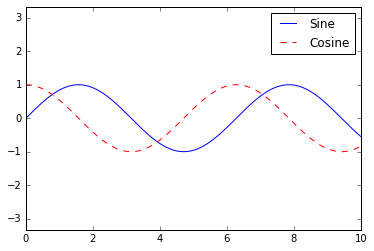

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

기본적인 정보는 충분히 주지만, 테두리가 공간을 많이 차지하고 위치도 변경하고 싶음

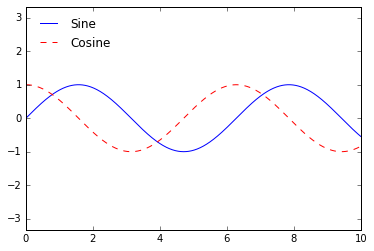

In [4]:
ax.legend(loc='upper left', frameon=False)
# frameon : 테두리 설정
fig

ncol 파라미터로 legend로 column 수를 조정할 수 있음

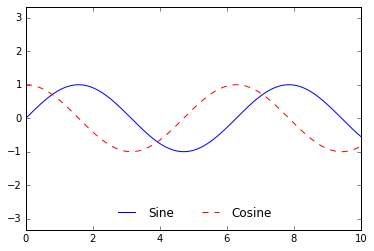

In [6]:
ax.legend(loc='lower center', frameon=False, ncol=2)
fig

fancybox 끝이 둥근 테두리 <br>
shadow 박스에 음영 <br>
alpha 박스 투명도 조절

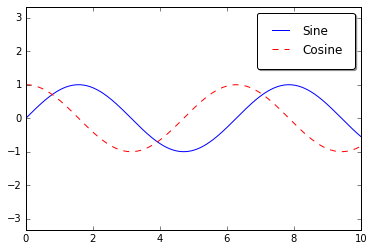

In [7]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### Choosing Elements for the Legend
legend는 기본적으로 plot에 있는 모든 label이 있는 element에 대해서 그려짐 <br>
일부의 label만 보고 싶으면 plot의 return object를 활용해서 legend를 조정해야 함

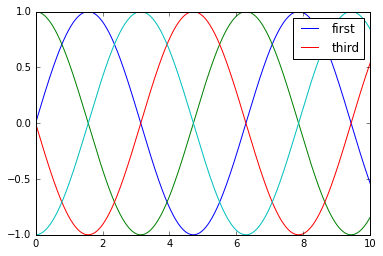

In [9]:
x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
# 이렇게 되면 y는 x값에 0 pi, 0.5 pi, 1 pi, 1.5 pi 가 더해진 sin 함수 4가지가 됨
lines = plt.plot(x, y)
# 동시에 4가지의 plot을 구림ㅁ

# 앞의 2개만 legend를 붙여줌
# list처럼 표현하면 됨
plt.legend(lines[::2], ['first', 'third']);

개별 plot에 대해서 label을 붙이는 방식도 가능함 <br>
legend는 기본적으로 label 속성이 없는 경우에는 표시되지 않음

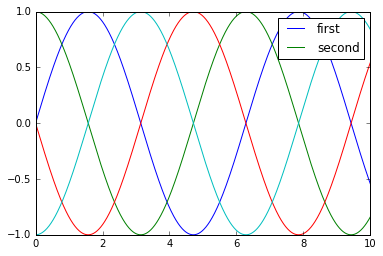

In [10]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

### Legend for Size of Points
기본적으로 제공하는 legend 기능들만으로 표현하기 힘든 경우가 있음 <br>
점의 크기가 중요한 정보를 나타낼 때, 각 크기가 어느정도 값을 나타내는지를 legend로 나타내고 싶을 때, <br>
ex) 점의 크기는 캘리포니아 각 도시아 넓이를 나타내고, 색상은 인구를 나타냄

In [ ]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')
# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd'] # 위도와 경도를 추출
population, area = cities['population_total'], cities['area_total_km2'] # 인구와 넓이를 추출합니다.
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7) # 직관적임
# 레이블을 위한 코드를 별도로 작성함
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population');

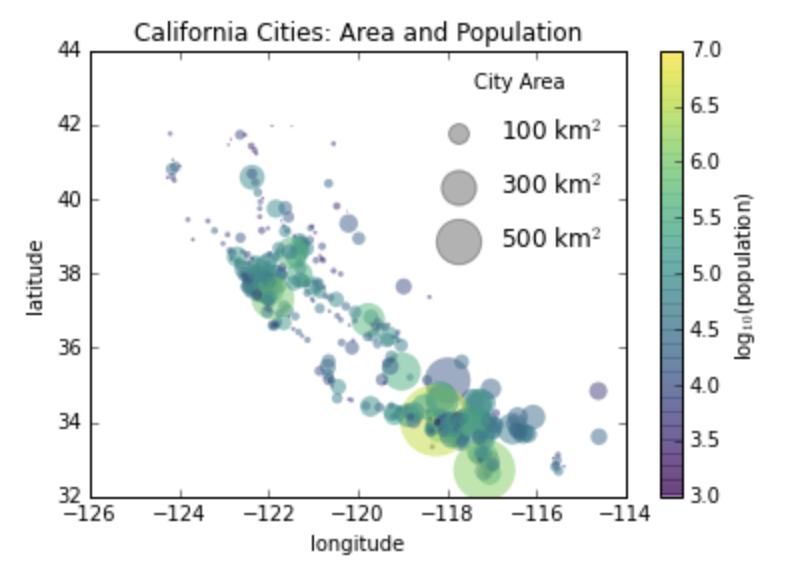

matplotlib의 legend는 그래프에 실제로 존재하는 Object를 reference로 가지고 있어야 함 <br>
이 경우 회색의 점은 Plot에 없지만, empty list를 통해서 존재하는 것 처럼 만드는 트릭을 슴 <br>
보통 label이 있는 경우에만 legend가 표시되니 위에 그린 점들은 legend에 나타나지 않음 <br>
이런 방식으로 label을 위한 가짜 plot을 한 번 하는 트릭이 다양한 경우에 문제를 해결하는 도움을 줌

### Multiple Legends
한 axes에 대해서 여러 개의 legends를 만들고 싶다면? <br>
기본적 legend object의 경우 한 axes당 한 개만 만들 수 있음 <br>
그래서 plt.legend()나 ax.legend()을 통해 두 번째 legend를 설정하면 첫번째 legend는 지워짐 <br>
lower-level ax.add_artist() method를 통해 두 번쨰 legends를 수동으로 입력해야 함

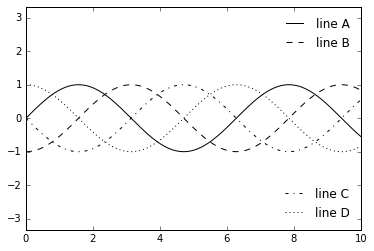

In [11]:
from matplotlib.legend import Legend

fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)
for i in range(4):
    # lines는 리스트 형태
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')
# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)
# Create the second legend and add the artist manually.
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False) # legend object를 만들고
ax.add_artist(leg); # add_artist를 통해서 두 번째 legends를 만들어 줌

## Customizing Colorbars
지금까지는 "점"들에 대한 정보를 보여주는 방법에 대해 배움 <br>
연속적인 color를 다룰 때는 legend로 모든 정보를 표시하는 것이 보통 불가능함 <br>
이 경우에는 별도의 axes를 분리해서 colorbar를 만들 수 있음 (colorbar를 만들면 이 colorbar는 원래의 axes와 다른 새 axes가 만들어짐)

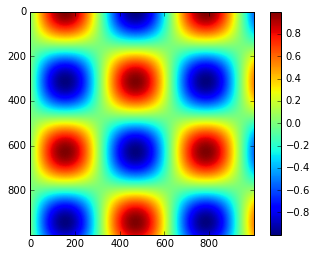

In [12]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

cmap argument를 Plotting func에 입력하는 것으로 사용할 수 있음

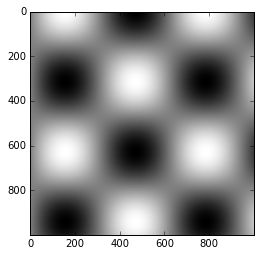

In [16]:
plt.imshow(I, cmap='gray');

### Choosing the Colormap
colormap을 아래와 같은 카테고리로 나눌 수 있음 <br>
<li> Sequential colormaps: 연속되는 한 가지 계통 색상으로 구성된 colormap 
<li> Divergent colormaps : positive와 negative를 구분하는 등을 위해 사용되는 2가지 컬러를 사용하는 colormap <br>
<li> Qualitative colormaps : 여러 색을 섞은 colormap
    
    
jet colormap이 기본으로 사용되다가 시각화에서 좋은 선택이 아닌 경우가 많았음

In [17]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))   
    # convert RGBA to perceived grayscale luminance. ref. http://alienryderflex.com/hsp.html
#     눈으로 보기에 흑백과 가장 비슷하게 바꾸어줌
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    
def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))   
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

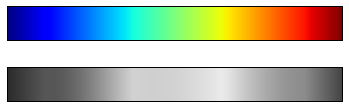

In [19]:
view_colormap('jet')
# 실제로 밝기를 보면 양쪽이 가장 어두움, 즉 흑백으로 구분이 안되어 시각화에 왜곡을 가져올 가능성이 있음

viridis는 matplotlib 2.0 이후 부터의 기본값, 값에 따라 일관된 밝기 변화를 유지함

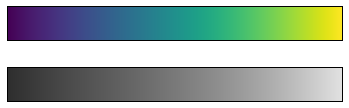

In [20]:
view_colormap('viridis')

무지개 같은 화려함을 원한다면 cubehelix로 대체할 수 있음

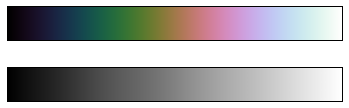

In [21]:
view_colormap('cubehelix')

평균을 기준으로 위아래를 나누거나 양의 값과 음의 값을 비교하거나 하는 경우엔 Divergent가 적당함 <br>
단점 : grayscale로 변환하면 정보를 잃어버림

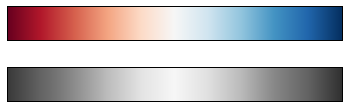

In [23]:
view_colormap('RdBu')

### Color limits and extensions
Matplotlib은 다양한 color customization 기능을 지원함 <br>
colorbar : 자체의 별도 plt.Axes object <br>
axes에 사용되는 여러가지 setting들을 사용할 수 있어 자유도가 높음 <br>
colorbar의 구간을 줄이고, 그 구간을 넘어가는 경우 어떻게 처리할지를 extend property를 통해 지정이 가능함

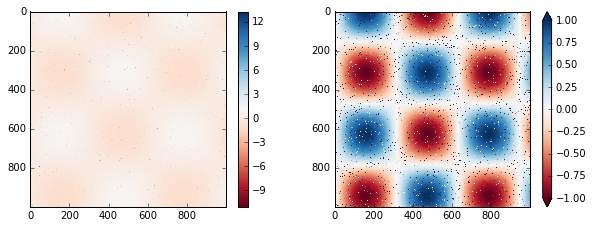

In [25]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
# both : 컬러바랑 동일한 색상으로 표현 됨
plt.colorbar(extend='both')
plt.clim(-1, 1);

왼쪽의 그림은 노이즈로 원 데이터가 제대로 보이지 않음 -> color limit를 설정하여 노이즈를 제외한 나머지 패턴이 명확하게 보임

### Discrete Color Bars
Colormap은 기본적으로 연속적임 <br>
때로는 불연속적 colormap을 사용하고 싶을 때가 있음 -> plt.cm.get_cmap() function에서 colormap 이름과 몇 개의 구간으로 나눌지 지정해줌

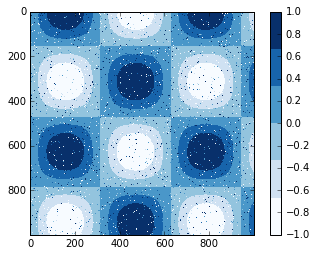

In [26]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

#### EX) Handwritten Digits
Discrete colorbar를 사용해서 예제 그림을 그림 <br>
scipy.dataset에는 0~5까지의 손으로 쓴 8 * 8 사이즈의 이미지 2000개를 모아둔 digits dataset이 있음

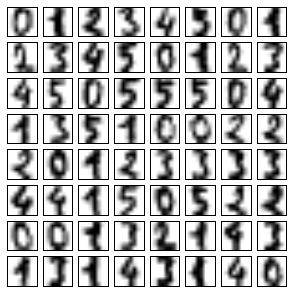

In [27]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(5, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

모든 digit는 각각의 64픽셀로 구성되어 있음. 64개의 digit는 각각 64 dimensional hyperspace space상에 존재하는 벡터처럼 이해할 수 있음. 각 벡터의 성분은 한 픽셀의 밝기 값이 됨 <br>

이러한 64차원 바로 시각화하기는 힘드므로 2차원으로 차원 축소를 해봄 t-sne 방법이 있지만 isomap 방식을 사용해 봄
- isomap : 일단 최근접점들을 그래프로 만들고 그래프를 hyperplane에 배치하는 방식으로 만들어짐

In [28]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2) # 2차원으로 축소
projection = iso.fit_transform(digits.data)

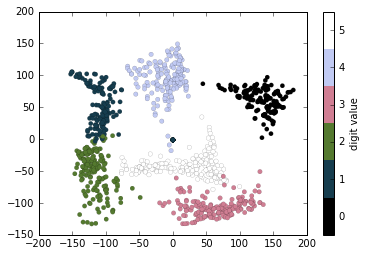

In [30]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6)) # 6개의 구간으로 나눈 discrete map을 생성
plt.colorbar(ticks=range(6), label='digit value') #tick을 6개로 설정
plt.clim(-0.5, 5.5) # 전체 범위를 -0.5 에서 5.5까지로 제한

# 서로 다른 구역을 숫자마다 차지하고 있음을 알 수 있음

- 5와 3, 그리고 2와 1의 점들이 겹침
    - 즉 다르게 말하자면, 가끔 손으로 쓴 5와 3, 그리고 2와 1은 구분하기 힘든 경우가 생긴다는 것 <br>

- 0과 1같은 경우는 매우 거리가 멈
    - 즉, 매우 명확하게 구분할 수 있음, 그래서 5와 3이나 2와 1은 classification task에서 에러가 서로 많이 발생할 확률이 높지만, 0과 1은 그런 문제가 없음 

## Multiple Subplots
한 번에 여러 개의 panel이 있는 그래프를 그리는 방법 

Matplotlib은 subplot이라는 개념을 가지고 접근함. subplot은 전체 figure보다 작거나 같은 크기의 axes들이 한 figure안에 존재할 수 있게 함

In [31]:
plt.style.use('seaborn-white')

### plt.axes : Subplots by Hand
axes를 만드는 가장 간단한 방법 : plt.axes를 사용하는 것, 아무런 파람미터를 입력하지 않으면 기본적으로 figure 전체를 채우는 axes를 만들어줌 

작은 크기의 axes를 만드는 경우에는 [left, bottom, width, height] 형태의 리스트를 파라미터로 넣어줌. <br>
ex) 오른쪽 위에 작은 inset axes를 만들고 싶을 때
- left와 bottom 값인 0.65는 그래프가 전체의 65%인 점에서 시작한다는 것을 의미함, 뒤의 width와 height는 그래프가 전체의 20% 크기라는 것을 의미함

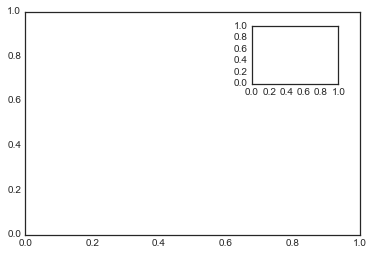

In [32]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

동일한 object oriented 함수는 fig.add_axes()임, 같은 크기의 위아래로 붙은 axes 두 개 생성

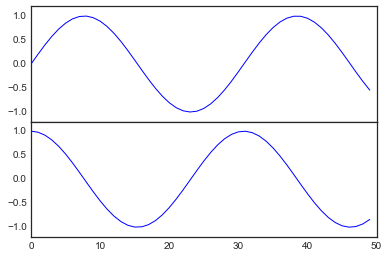

In [34]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### plt.subplot : Simple Grids of Subplots
인덱스 기반의 aligned subplot을 만들 수 있음, plt.subplot()은 그리드 안에 있는 한 개의 subplot을 만들어줌. 3개의 정수 파라미터를 받음 (number of rows, number of columns, index of subplot) 순서

subplot의 인덱스는 좌측 상단부터 우측 하단까지 순서대로 증가

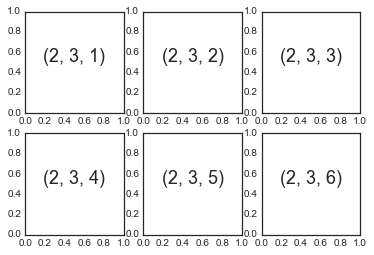

In [37]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')
# 서로 너무 붙어있어서 답답한 느낌이 남

plt.subplots_adjust 함수를 통해서 공간을 조정할 수 있음
- hspace, wspace를 통해 subplot의 사이즈를 기준으로 얼마나 subplot 사이를 띄어지를 결정함

혹은 간격을 자동으로 조정해주는 plt.tight_layout() / fig.tight_layout() 함수도 있음 <br>
plt.subplot()과 동일한 object oriented func은 fig.add_subplot() 


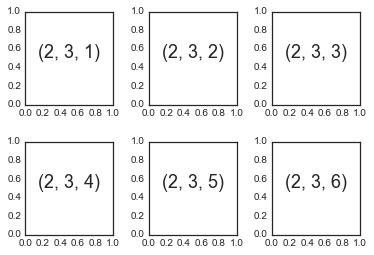

In [40]:
fig = plt.figure()
# 40% 띄우도록 설정함
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

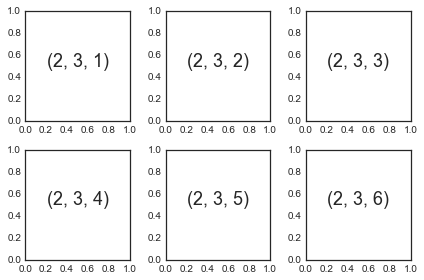

In [41]:
fig = plt.figure()
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')
fig.tight_layout()

### plt.subplots : The Whole Grid in One Go
grid의 매 axes 하나하나를 일일히 추가해야 하므로 나누는 갯수가 많아지면 많아질수록 비효율적임 -> plt.subplot<b>s</b>()를 사용할 수 있음 <br>
한 개의 subplot을 만들어 주는 것이 안니라, 전체의 grid subplot을 한 번에 만들어줌 <br>
subplots는 row의 수와 column의 수를 인자로 받음, sharex, sharey라는 arguments를 추가적으로 사용할 수 있음
- sharex, sharey : 어떤 축을 공유할지를 설정할 수 있음. 같은 scale의 축을 쓴다면 중복되는 축을 없애서 그림이 깔끔해짐
- return 값 중 두 번째 값은 ax는 numpy array임 numpy array는 index notation을 통해 직접 접근이 가능

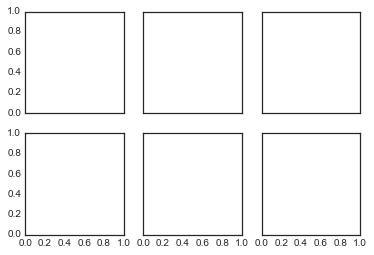

In [43]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
# sharex, sharey : x,y축을 공유함

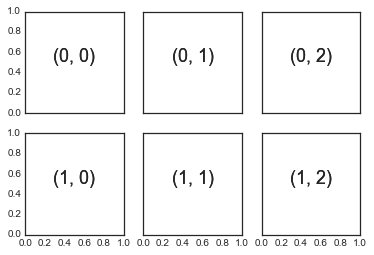

In [45]:
for i in range(2) :
    for j in range(3) :
        ax[i, j].text(0.5, 0.5, str((i,j)),
                     fontsize = 18, ha='center')
fig

plt.subplot(): index가 1부터 시작<br>
plt.subplots: index가 0부터 시작

### plt.GridSpec : More Complicated Arrangements
서로 다른 크기의 subplot들을 조합할 때 <br>
plt.GirdSpec() : plot을 바로 만들어 주진 않지만 plt.subplot()의 복잡한 옵션을 조금 편하게 사용할 수 있는 interface를 제공함

In [46]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)  

plt.subplot()의 각 그림이 어느 범위의 grid를 사용할지를 정해서 인자로 넣어줌

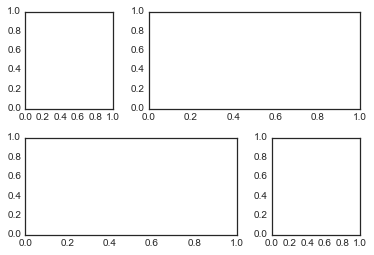

In [47]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

2차원 히스토그램이나 함께 각 축의 분포를 보여주는 분포를 그릴 때 유용함

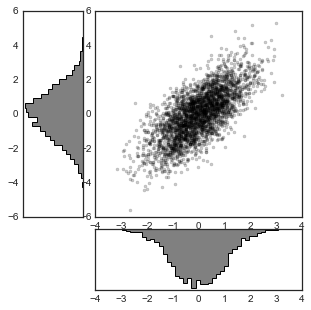

In [48]:
# 가우시안 분포라는 것을 확인할 수 있음
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T
# Set up the axes with gridspec
fig = plt.figure(figsize=(5, 5))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:]) # grid의 순서는 맨 위 좌측부터
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)
# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## Text and Annotation
좋은 시각화는 보는 사람이 그림에서 충분한 정보를 읽고 그 목적을 확실하게 이해하는 것, 때때로는 단순히 그래프와 점들만으로는 충분한 정보를 줄 수 없을 때가 있음, 정보를 위한 텍스트를 추가하는 것이 좋은 선택임

In [49]:
import matplotlib as mpl # mpl 패키지를 불러옵시다.
plt.style.use('seaborn-white') 

### EX) Effect of Holidays on US Births
아래 pivot은 모든 연도의 평균을 내어 각 날짜마다 태어난 아이의 수를 세는 것

In [ ]:
from datetime import datetime

births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)') 
# 너무 큰 에러 데이터는 제거해 줍니다.
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day) for (month, day) in births_by_date.index]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

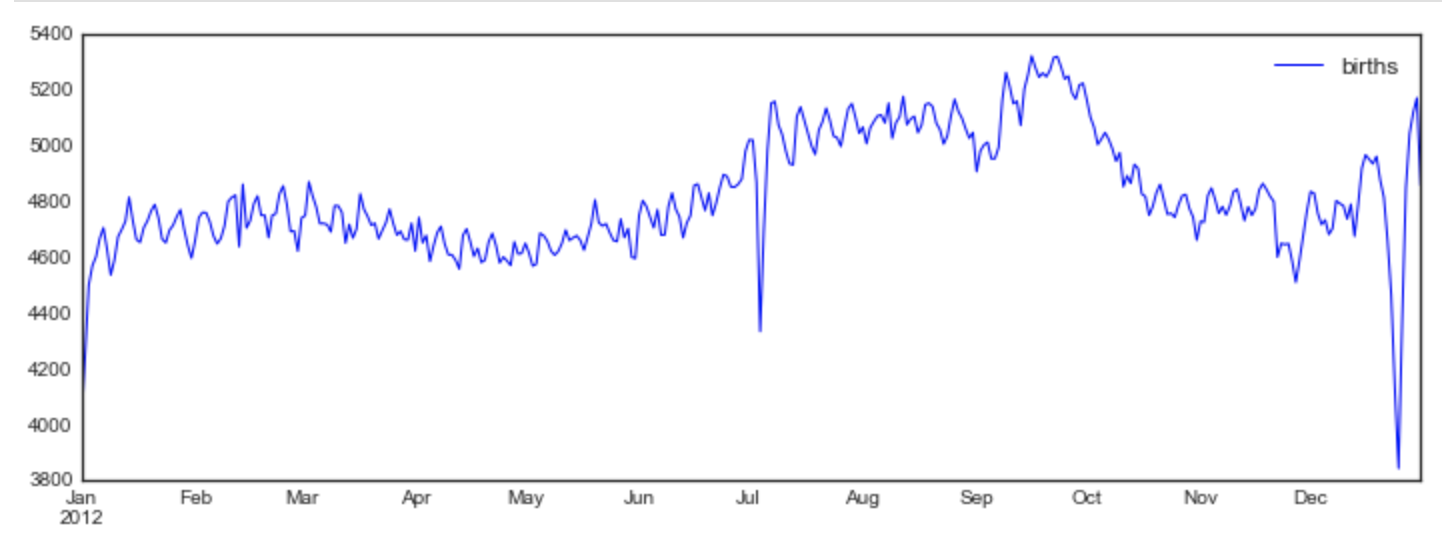

수치가 갑자기 떨어지는 지점에 대해 잘 알 수가 없음

plt.text/ax.plt command를 통해서 특정한 위치에 텍스트를 추가할 수 있음

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
# Add labels to the plot
style = dict(size=10, color='gray') # 이런 형태로 style을 dict 형태로 인자로 넘겨줄 수 있습니다.
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)
# Label the axes
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

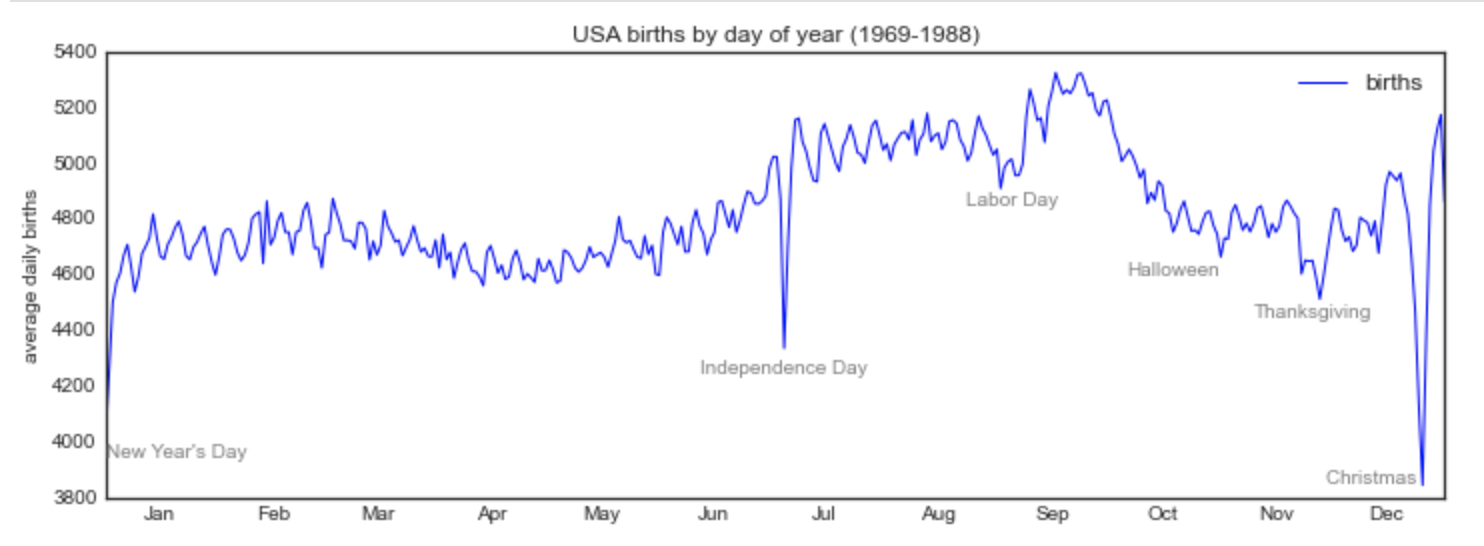

ax.text method는 (x위치, y위치, string)을 기본 인자로 받. color, size, style, alignment 등을 추가적인 keyword arguments로 받음

### Transforms and Text Position
데이터 값에 무관하게 axes나 figure 전체를 기준으로 위치를 지정하는 것이 더 적절한 경우가 많음, 이 경우를 위해서 maplotlib은 transform 옵션을 통해 이 위치를 변경할 수 있음 

- ax.transData : 데이터 값을 기준으로 함
- ax.transAxes : axis를 기준으로 함
- fig.transFigure : figure를 기준으로 함

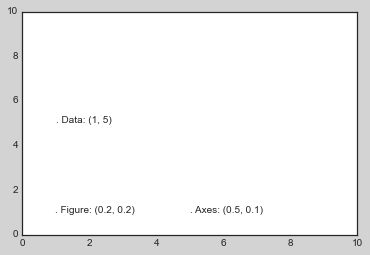

In [53]:
fig, ax = plt.subplots(facecolor='lightgray') #fig 영역과 axes 영역을 구분
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

기본적으로 text align은 left, 그러므로 각 text의 .은 각 text의 정확한 기준점을 의미

transData 좌표는 x와 y의 범위가 변하면 그 위치가 변함, transAxes 는 경우 axes의 좌측 하단을 (0, 0) 우측 상단을 (1, 1)로 해서 상대적인 위치를 계산<br>
이 그림에서는 "흰색 박스"가 axes의 영역 <br>
하지만 figure 전체에서 좌측 하단을 (0, 0)으로 우측 상단을 (1, 1)로 두고 계산 -> 이 그림에서는 "회색 박스"와 "흰색 박스" 전체가 figure의 영역

만약 x와 y축의 범위를 바꾸면 transData 만 영향을 받음

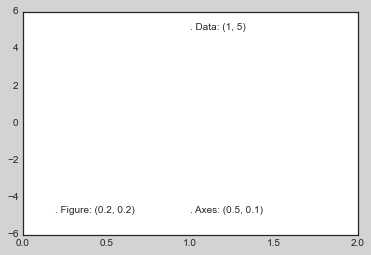

In [52]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

## Arrows and Annotation
text와 함께 화살표를 이용하면 더 효율적인 시각화가 가능함 

Matplotlib에서 화살표를 그리기 : plt.arrow()함수
- SVG object로 그림의 비율이나 해상도에 따라 조금씩 달라짐
- plt.annotate()를 사용함면 여러가지 화살표를 예쁘게 그릴 수 있음

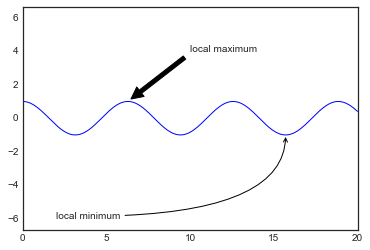

In [54]:

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), 
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
# connectionstyle 0도 -90도로 휘어지게 그림

# Visualization with Seaborn 
matplotlib는 문제가 있음
- 2.0 버전 이전의 Matplotlib의 기본 plot들은 예쁘지 않고 시각화 결과가 좋지 않음
- low-level api를 제공하기 때문에 다양한 시각화를 할 수 있지만 보통 사람의 손을 많이 타고 코드가 길어짐
- 데이터 분석에 pandas / dask 등이 널리 사용되고 있지만 matplotlib은 pandas 보다 먼저 만들어짐. Dataframe을 사용하기에 최적화되어 있지 않아 Dataframe의 각 column을 Series로 추출해 사용해야 함

-> 간편하게 개선하기 위해서 Seaborn이라는 라이브러리가 있음

## Seaborn Versus Maplotlib

In [57]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [59]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

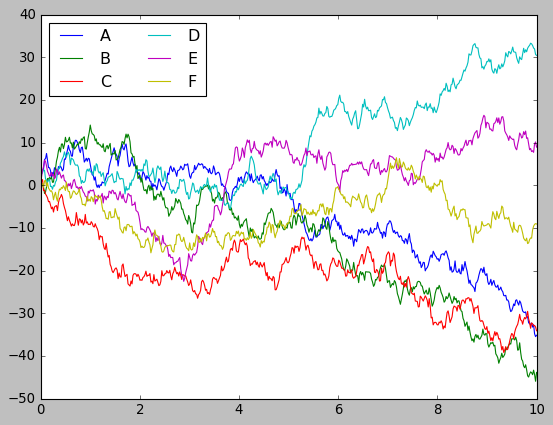

In [60]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

우리가 원하는 정보가 다 들어있음

seaborn은 자체적으로 그림을 그리기 위한 high-level 도구들을 제공, 더불어서 seaborn 자체가 matplotlib에 기반하고 있으므로 seaborn을 사용하는 자체로 현재 시각화중인 그림의 기본파라미터를 set() method를 통해서 seaborn 스타일로 바꿀 수 있음

In [62]:
import seaborn as sns
sns.set()

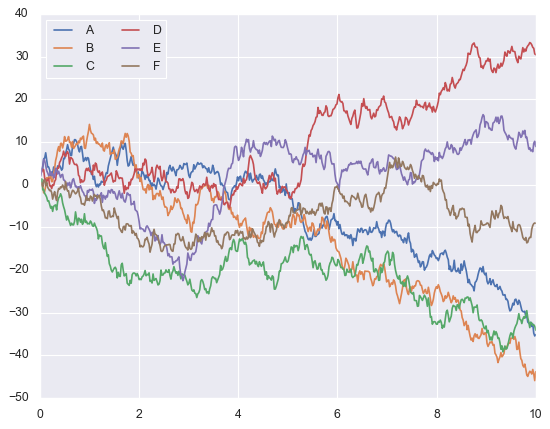

In [63]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

 ### Exploring Seaborn Plots
 Seaborn은 주로 matplotlib의 복잡한 low-level interface를 사용하지 않고 high-level command를 통해서 쉽게 시각화 해주기 위해서 씀


#### Histograms, KDE and densities
kde를 하기 위해서 별도로 scipy를 불러와야 했지만 seaborn은 자체 sns.kdeplot이 있음

In [65]:
import pandas as pd

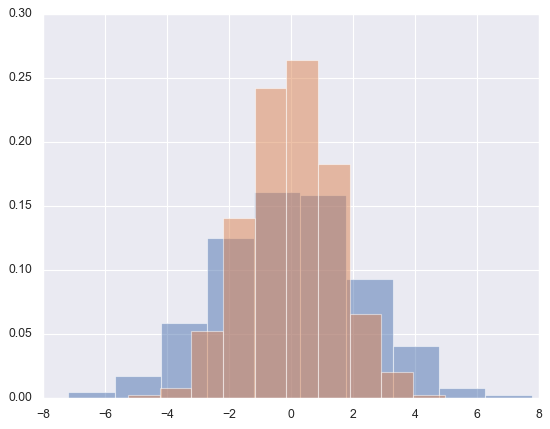

In [66]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

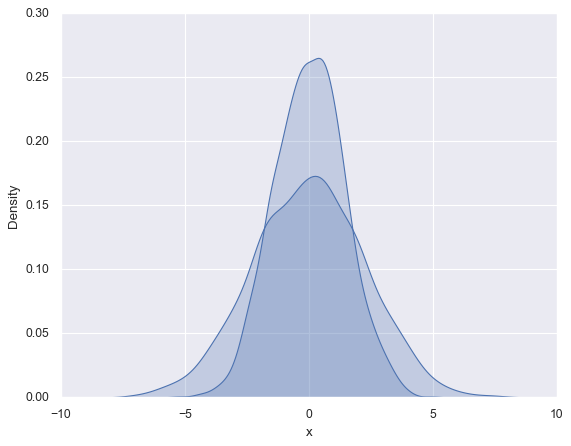

In [67]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


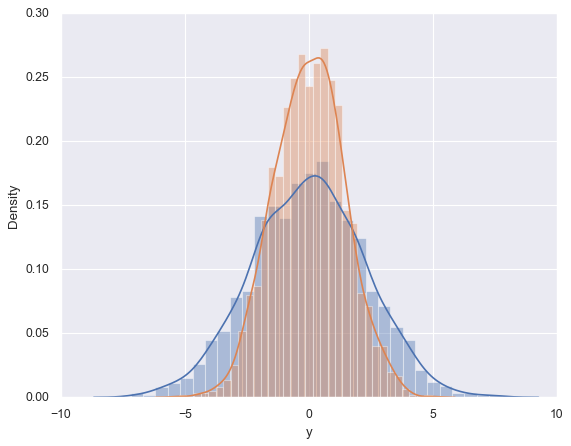

In [69]:
sns.distplot(data['x'])
sns.distplot(data['y']);
# 동시에 그릴 수도 있음

2 dimension dataset도 kdeplot을 통해서 그릴 수 있음, 기본 설정은 contour plot을 그려줌

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


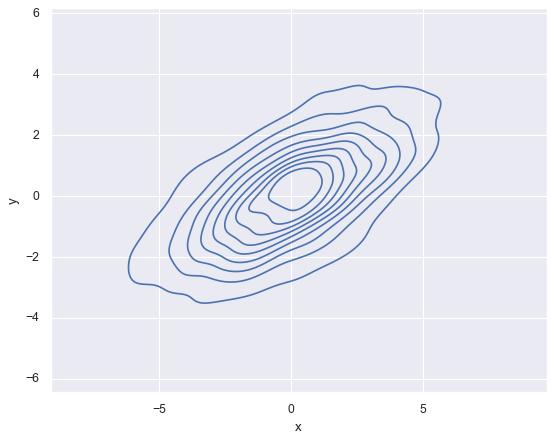

In [70]:
sns.kdeplot(data['x'], data['y']);

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


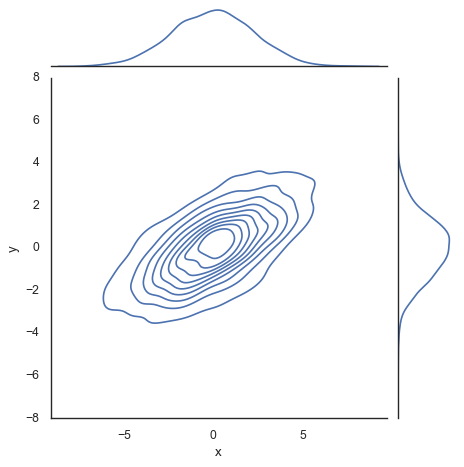

In [71]:
with sns.axes_style('white'): # 배경을 흰 색으로 바꿉니다.
    sns.jointplot("x", "y", data, kind='kde');

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


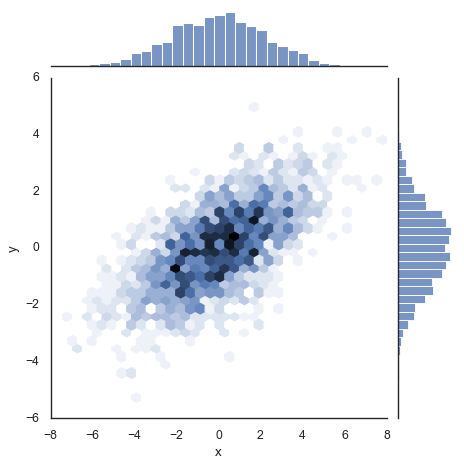

In [72]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

## Pair plots
더 큰 차원에서 joint distribution에 대한 분석을 하고 싶을 때 <br>
seaborn의 pair plots 기능을 사용하면 됨

In [73]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


4가지 feature 사이의 관계가 보고 싶으면 sns.pairplot을 사용

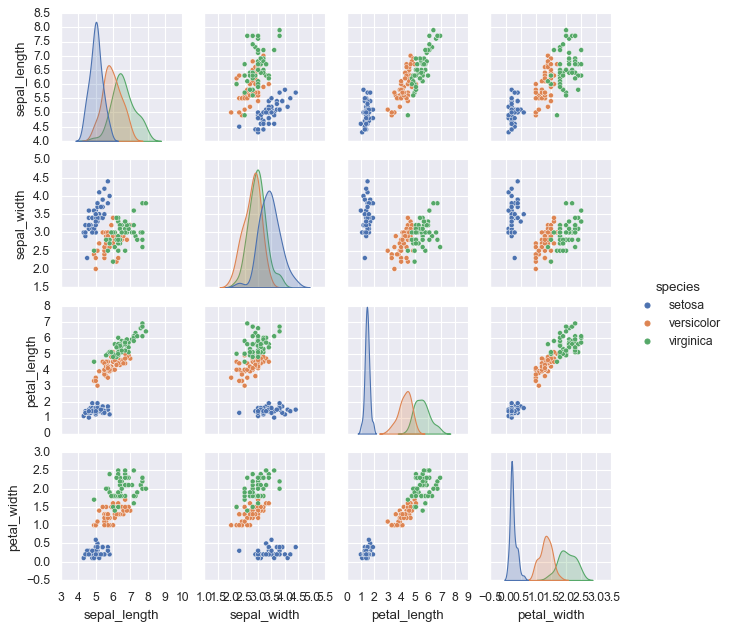

In [74]:
sns.pairplot(iris, hue='species', height=2);

## Faceted histograms
때때로는 데이터 분석을 위해 어떤 subset에 대한 시각화를 하는 것이 중요함. 임의의 subset에 대해서 그림을 그리기 위해서는 FacetGrid 함수를 사용

In [75]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


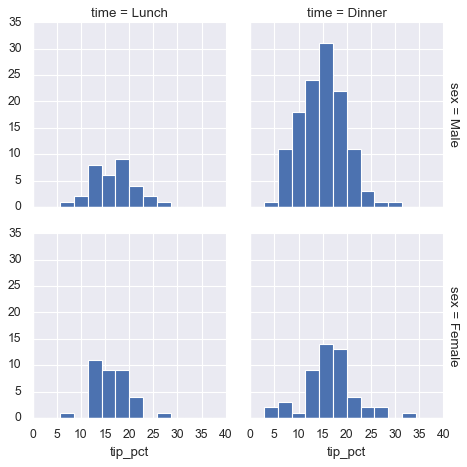

In [76]:
# 팁을 식사 액수의 몇%나 냈는지 통계
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

# 각 row는 음식값을 지불한 성별, column은 점심식사와 저녁식사를 구분
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


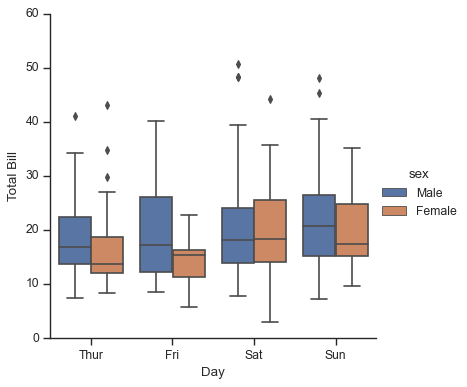

In [77]:
# 요일에 따라 tip의 금액이 달라 질까?
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


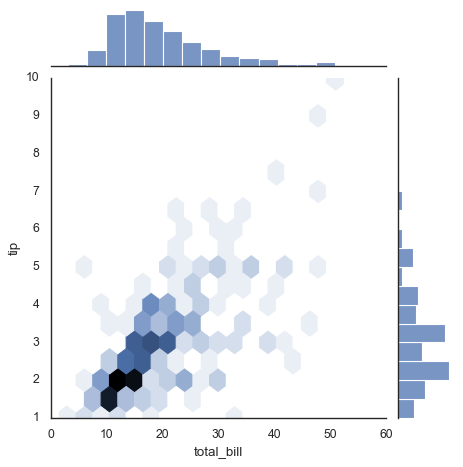

In [78]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

kin='reg' 옵션은 linear regression line과 함께 각 변수의 KDE와 histogram을 같이 보여줌

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


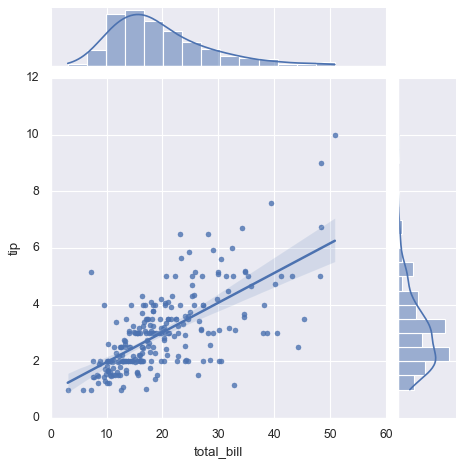

In [79]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

## Bar plots
sns.factorplot은 시계열 그래프의 시각화도 쉽게 만들어줌

In [80]:
# Seaborn의 planets 데이터셋
planets = sns.load_dataset('planets')
planets.head()
planets["method"].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


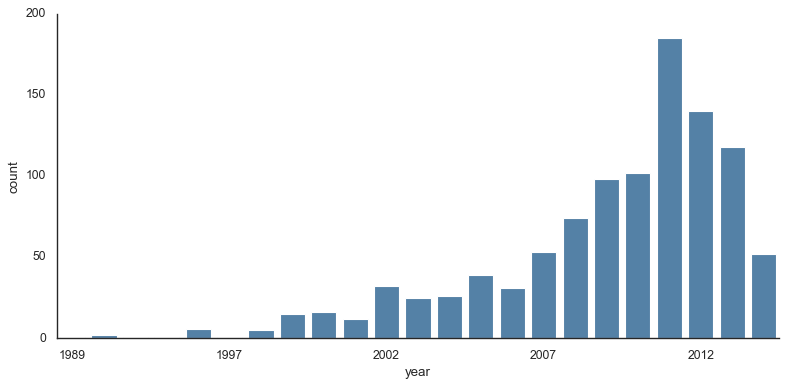

In [81]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

planet들을 관측한 방법에 따라 따로 그리고 싶을 때는 hue option을 추가함

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


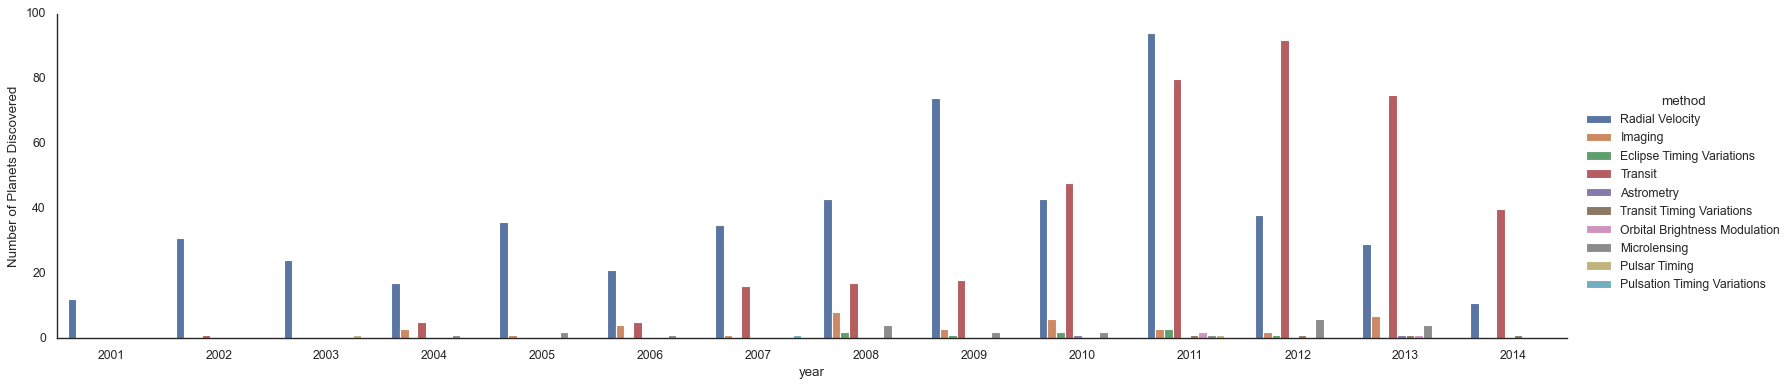

In [82]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

### EX) Exploting Marathon Finishing Times

In [83]:
# !cd data && curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0  1011k      0 --:--:-- --:--:-- --:--:-- 1012k


In [84]:
data = pd.read_csv('./data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


중간점을 통과한 시간과 최종 결승선을 통과한 시간으로 구성된 데이터

pandas는 기본적으로 시간을 python string으로 저장 -> 시간으로 바꿔줌

In [85]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('data/marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [86]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

시간을 초 단위로 바꾸어 줌, integer로 변환하면 기본적으로 nanosecond 단위이므로 10^9으로 나누어줌

In [87]:
data['split_sec'] = data['split'].astype("int64") / 1E9
data['final_sec'] = data['final'].astype("int64") / 1E9
data.head()

/var/folders/d2/ps9m0gd51mz84h38fqzd3q1h0000gn/T/ipykernel_21262/2239920341.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['split_sec'] = data['split'].astype("int64") / 1E9
/var/folders/d2/ps9m0gd51mz84h38fqzd3q1h0000gn/T/ipykernel_21262/2239920341.py:2: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['final_sec'] = data['final'].astype("int64") / 1E9


,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


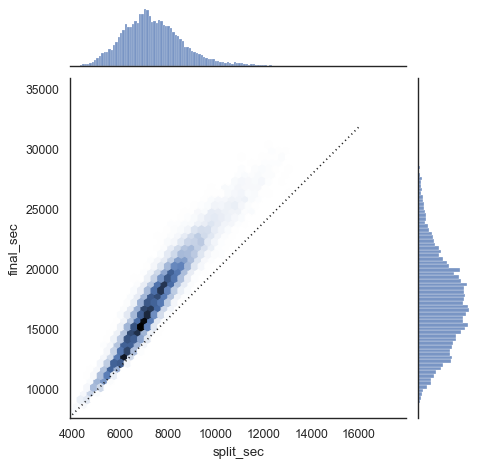

In [88]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

점선은 f(x) = 2x라인 -> 균일한 페이스로 뛰게 되면 점선과 같은 기울기로 점들이 몰려 나옴, 실제로는 점선보다 기울기가 큼, 즉 후반부 페이스가 더 떨어짐

In [90]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


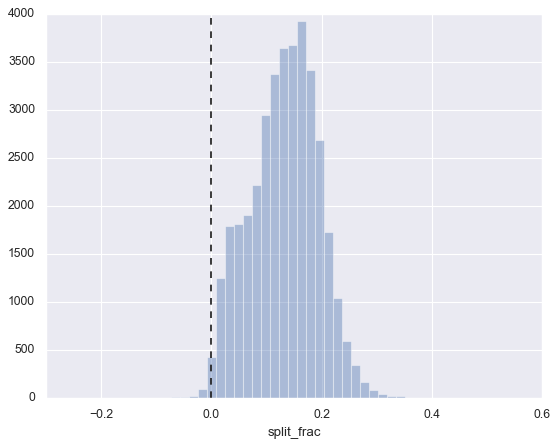

In [91]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [92]:
sum(data.split_frac < 0)

251

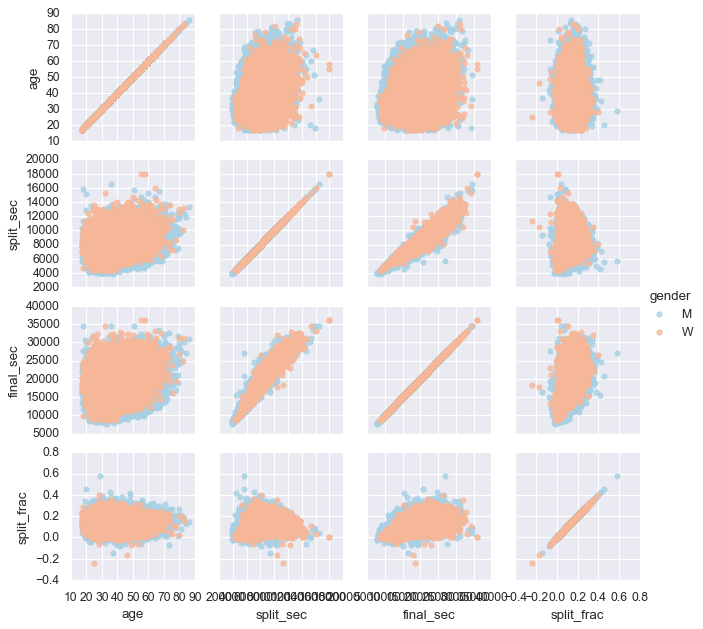

In [93]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r', height=2)
g.map(plt.scatter, alpha=0.8)
g.add_legend();

대부분의 경우 split_frc과 correlation이 거의 느껴지지 않음, 예외적으로 기록이 final_sec과는 약한 correlation, 기록이 빠른 마라토너가 전체적으로 전후반 페이스 차이가 적다는 것을 알 수 있음

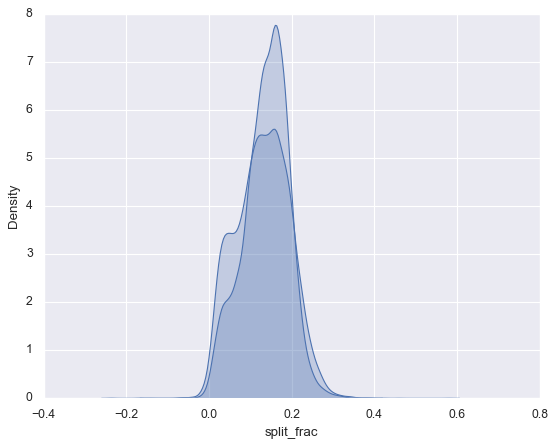

In [94]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

남성이 여성보다 조금 더 균일한 페이스로 뛰는 사람이 많음 

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


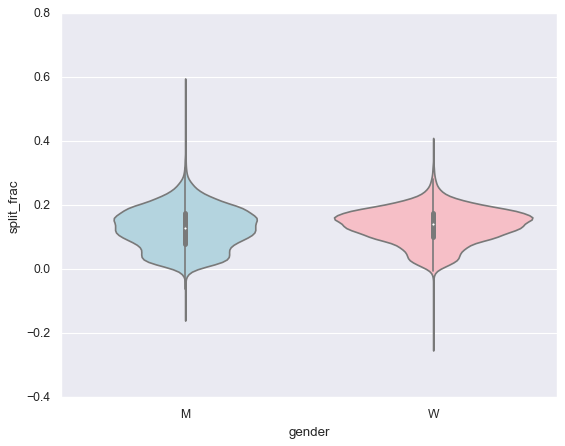

In [95]:
sns.violinplot("gender", "split_frac", data=data, palette=["lightblue", "lightpink"]);

bimodality이 나이에서 오는 것인지 확인

In [96]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


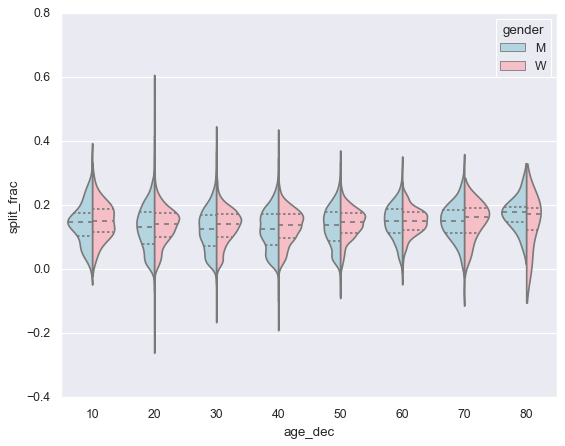

In [97]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile", # split=True 옵션을 주면 두 분포를 옆에 붙여 그립니다.
                   palette=["lightblue", "lightpink"]);

20~50대까지 동일한 나이의 남성이 동일한 나이의 여성보다 상대적인 후반부 페이스가 좋음 <br>
80세 이상은 여성이 훨씬 더 좋아보이는데 sample size가 너무 작기 때문일 수 있음

In [98]:
(data.age > 80).sum()

7

남성의 기울기가 여성에 비해 가파르게 나옴

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


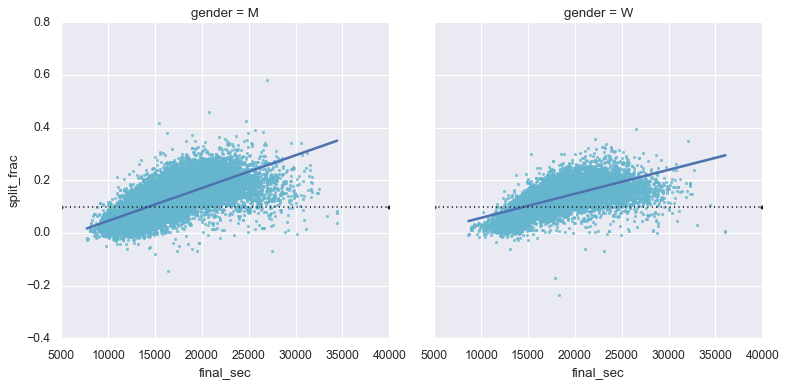

In [99]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");